<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/Video_Games_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files 

uploaded = files.upload()

import io

data = pd.read_csv(io.BytesIO(uploaded['Video_Games_Sales.csv']))

Saving Video_Games_Sales.csv to Video_Games_Sales.csv


In [53]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,1970-01-01 00:00:00.000002006
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000001985
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1970-01-01 00:00:00.000002008
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,1970-01-01 00:00:00.000002009
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000001996


## Context
Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900

## Content
Alongside the fields: Name, Platform, YearofRelease, Genre, Publisher, NASales, EUSales, JPSales, OtherSales, Global_Sales, we have:-

- Critic_score - Aggregate score compiled by Metacritic staff
- Criticcount - The number of critics used in coming up with the Criticscore
- User_score - Score by Metacritic's subscribers
- Usercount - Number of users who gave the userscore
- Developer - Party responsible for creating the game
- Rating - The ESRB ratings
- Acknowledgements
This repository, https://github.com/wtamu-cisresearch/scraper, after a few adjustments worked extremely well!

## Inspiration
It would be interesting to see any machine learning techniques or continued data visualizations applied on this data set.

In [54]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Year
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,1970-01-01 00:00:00.000002006
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000001985
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1970-01-01 00:00:00.000002008
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,1970-01-01 00:00:00.000002009
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000001996


In [55]:
# lets check the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             16717 non-null  object        
 1   Platform         16719 non-null  object        
 2   Year_of_Release  16450 non-null  float64       
 3   Genre            16717 non-null  object        
 4   Publisher        16665 non-null  object        
 5   NA_Sales         16719 non-null  float64       
 6   EU_Sales         16719 non-null  float64       
 7   JP_Sales         16719 non-null  float64       
 8   Other_Sales      16719 non-null  float64       
 9   Global_Sales     16719 non-null  float64       
 10  Critic_Score     8137 non-null   float64       
 11  Critic_Count     8137 non-null   float64       
 12  User_Score       10015 non-null  object        
 13  User_Count       7590 non-null   float64       
 14  Developer        10096 non-null  objec

In [56]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [57]:
# let's check the missing values 
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
Year                269
dtype: int64

In [58]:
# let's perform Univariate Analysis 




### UNIVARIATE 
- Numerical


In [59]:
num_cols = ['Year_of_Release', 
            "NA_Sales",
            "EU_Sales",         
            "JP_Sales",         
            "Other_Sales",     
            "Global_Sales",     
            "Critic_Score",     
            "Critic_Count",
            "User_Count"
    ]

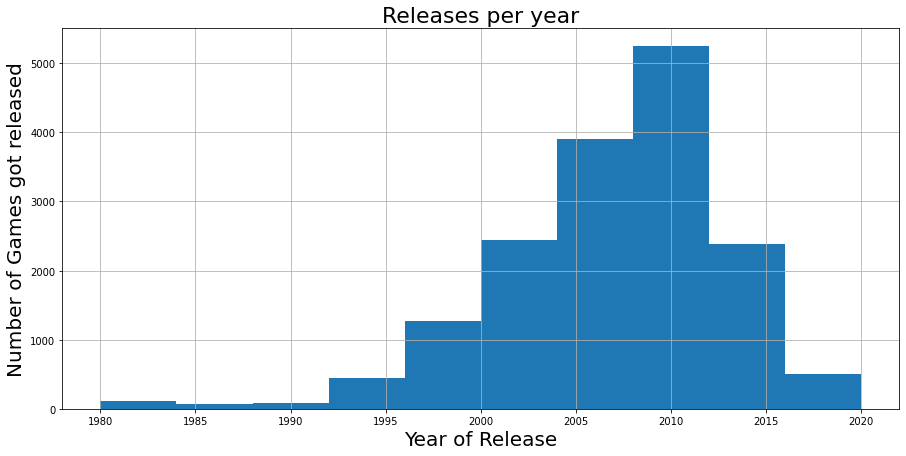

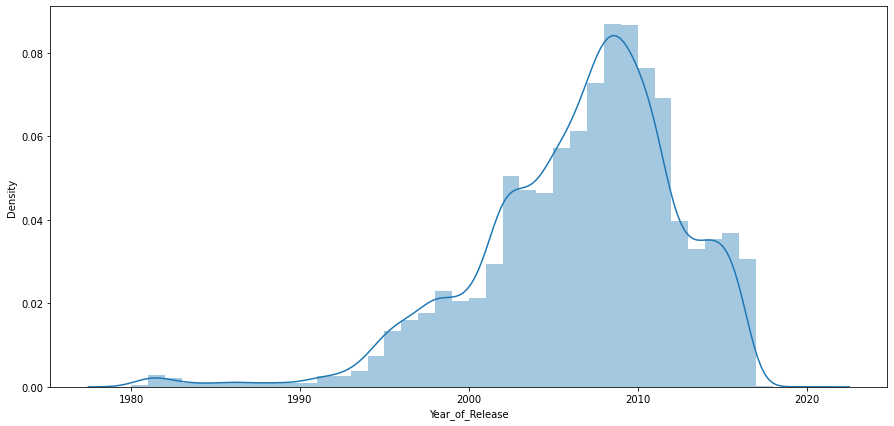

In [60]:
# let's explore the column Year_of_Release 
plt.figure(figsize=(15,7))
data['Year_of_Release'].hist()
plt.ylabel('Number of Games got released', size=20)
plt.xlabel('Year of Release', size=20)
plt.title('Releases per year', size=22)
plt.show()


# with KDE 
plt.figure(figsize=(15,7))

sns.distplot(data.Year_of_Release.dropna(), kde=True, bins=40)
plt.show()

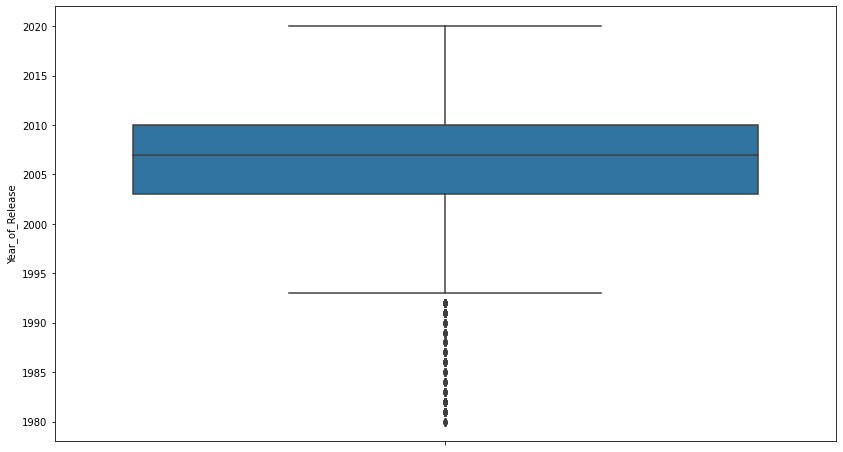

In [61]:
plt.figure(figsize=(14,8))

sns.boxplot(y=data["Year_of_Release"])
plt.show()

- Here you can see there are few outliers which are in after year 1990 
- from above histogram is also visible that year 1990 to 1980 lies far from the Sampled data

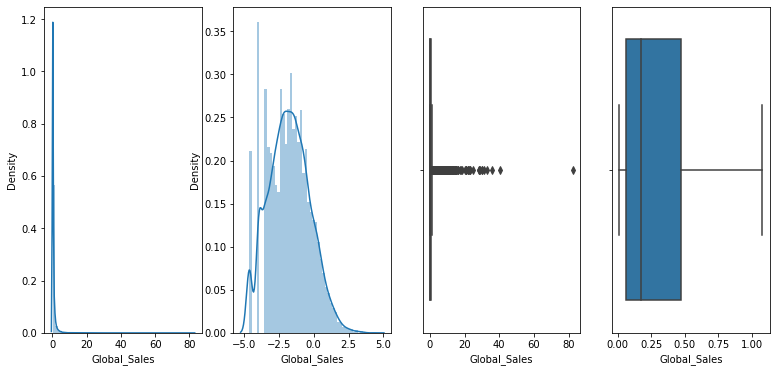

In [63]:
global_sales = data['Global_Sales']
fig, ax = plt.subplots(1, 4, figsize=(13, 6))
sns.distplot(global_sales.dropna(), kde=True, ax=ax[0])
sns.distplot(np.log(global_sales.dropna()), kde=True, ax=ax[1])

sns.boxplot(global_sales.dropna(), ax=ax[2])
sns.boxplot(global_sales.dropna(), ax=ax[3], showfliers=False)
plt.show()

In [64]:
#####
##
#
#

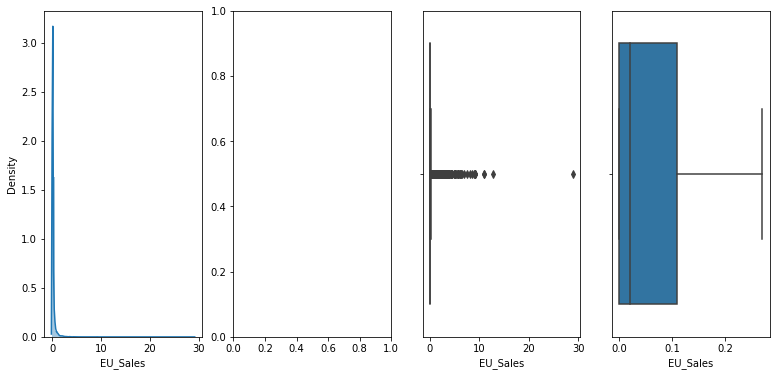

In [76]:
_sales = data['EU_Sales']
s =np.log(_sales.dropna())

fig, ax = plt.subplots(1, 4, figsize=(13, 6))
sns.distplot(_sales.dropna(), kde=True, ax=ax[0])
#sns.distplot(s.dropna(), kde=True, ax=ax[1])

sns.boxplot(_sales.dropna(), ax=ax[2])
sns.boxplot( _sales.dropna(), ax=ax[3], showfliers=False)
plt.show()

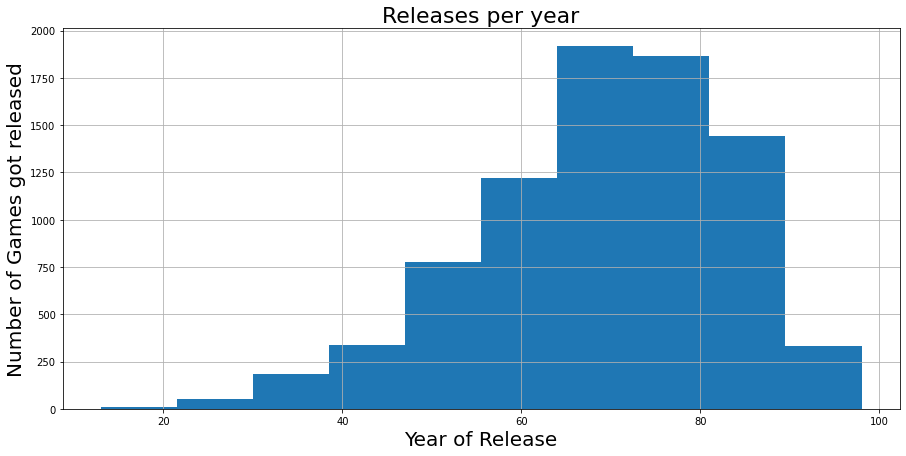

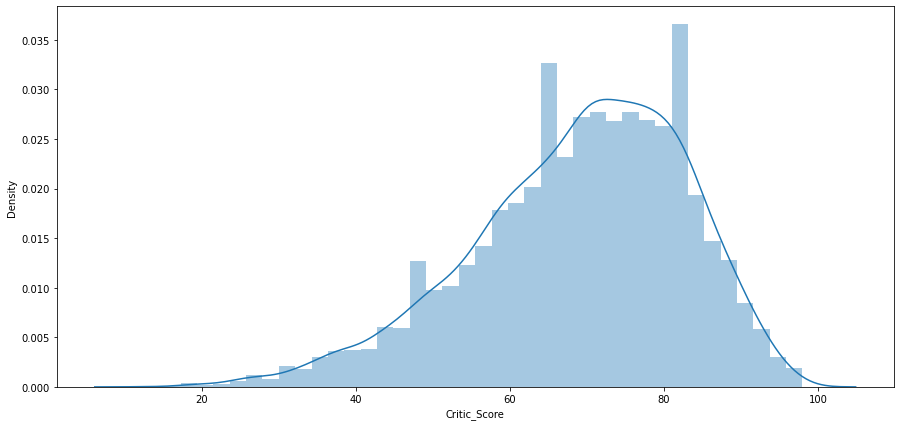

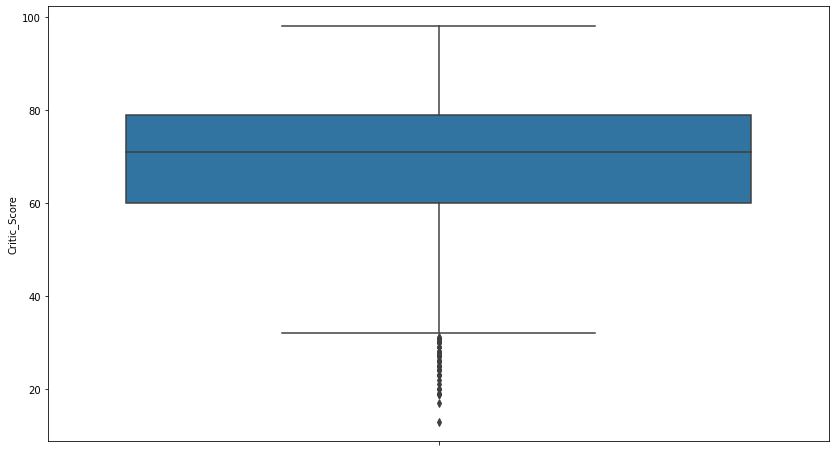

In [79]:
# let's explore the column Year_of_Release 
plt.figure(figsize=(15,7))
data['Critic_Score'].dropna().hist()
plt.ylabel('Number of Games got released', size=20)
plt.xlabel('Year of Release', size=20)
plt.title('Releases per year', size=22)
plt.show()


# with KDE 
plt.figure(figsize=(15,7))

sns.distplot(data.Critic_Score.dropna(), kde=True, bins=40)
plt.show()


plt.figure(figsize=(14,8))

sns.boxplot(y=data["Critic_Score"])
plt.show()

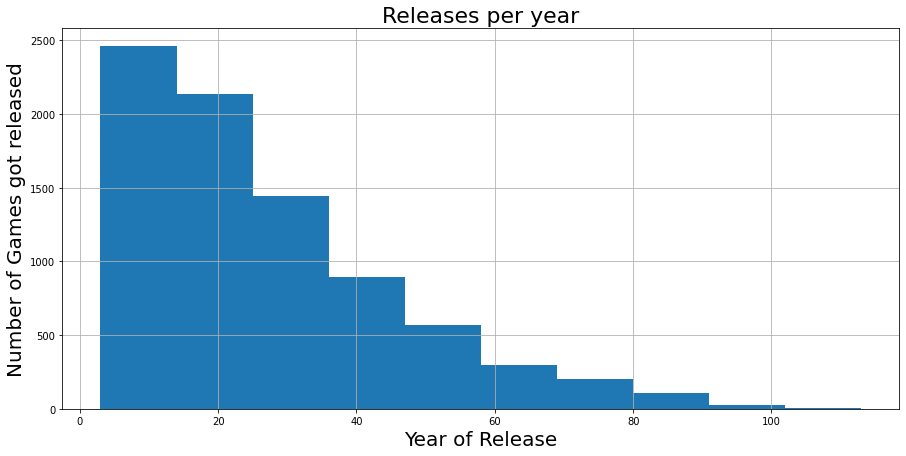

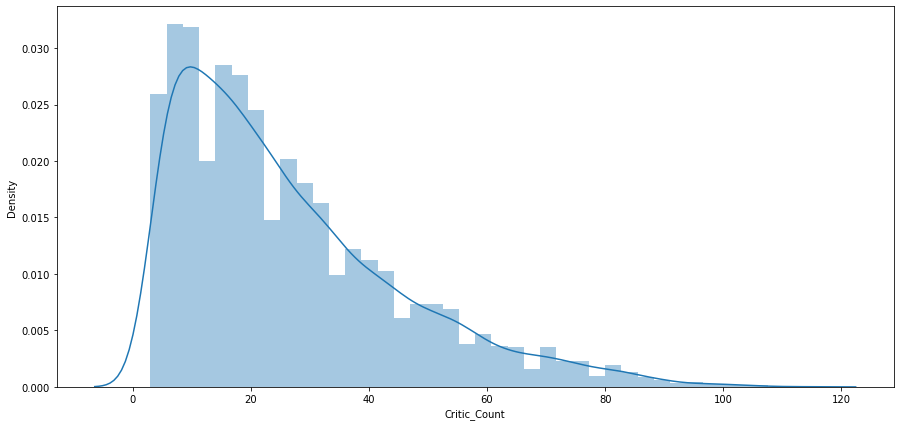

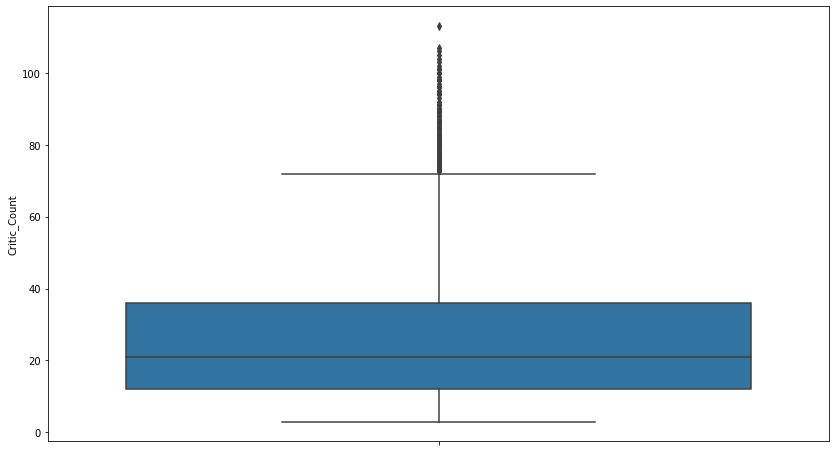

In [81]:
# let's explore the column Year_of_Release 
plt.figure(figsize=(15,7))
data['Critic_Count'].dropna().hist()
plt.ylabel('Number of Games got released', size=20)
plt.xlabel('Year of Release', size=20)
plt.title('Releases per year', size=22)
plt.show()


# with KDE 
plt.figure(figsize=(15,7))

sns.distplot(data.Critic_Count.dropna(), kde=True, bins=40)
plt.show()


plt.figure(figsize=(14,8))

sns.boxplot(y=data["Critic_Count"].dropna())
plt.show()

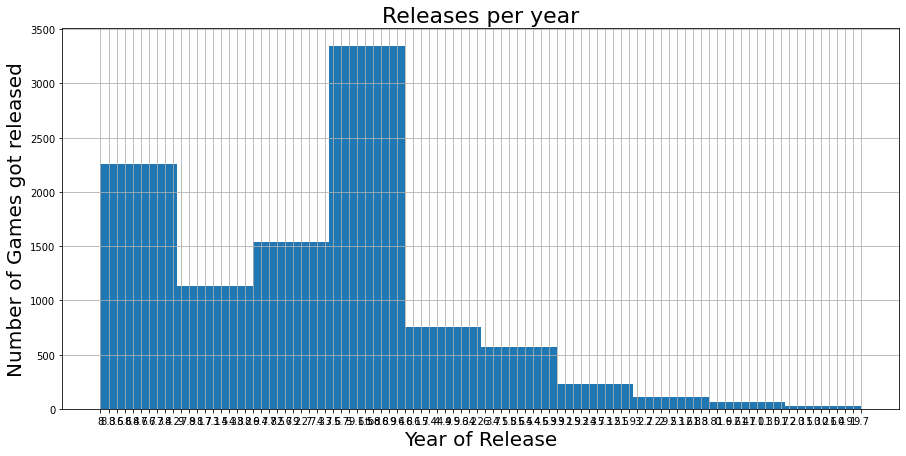

TypeError: ignored

<Figure size 1008x576 with 0 Axes>

In [85]:
# let's explore the column Year_of_Release 
plt.figure(figsize=(15,7))
data['User_Score'].dropna().hist()
plt.ylabel('Number of Games got released', size=20)
plt.xlabel('Year of Release', size=20)
plt.title('Releases per year', size=22)
plt.show()





plt.figure(figsize=(14,8))

sns.boxplot(y=data["User_Score"])
plt.show()